In [49]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions 

In [50]:
data=pd.read_csv(r'F:\Eye Disease\Features.csv')

In [51]:
data.head()

,HOG_feature_0,HOG_feature_1,HOG_feature_2,HOG_feature_3,HOG_feature_4,HOG_feature_5,HOG_feature_6,HOG_feature_7,HOG_feature_8,HOG_feature_9,...,HOG_feature_8183,HOG_feature_8184,HOG_feature_8185,HOG_feature_8186,HOG_feature_8187,HOG_feature_8188,HOG_feature_8189,HOG_feature_8190,HOG_feature_8191,Label
0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,0.577350,0.0,0.57735,0.0,0.577350,0.0,0.0,0.0,0.586302,0.0,...,0.0,0.707107,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0
2,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
3,0.707107,0.0,0.00000,0.0,0.707107,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.707107,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0
4,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0


In [52]:
data.drop(data[data['Label'] == 1].index, inplace=True)
data.drop(data[data['Label'] == 2].index, inplace=True)

In [53]:
data['Label'] = data['Label'].replace(3, 1)

In [54]:
data.shape

(2112, 8193)

In [55]:
X=data.drop(['Label'],axis=1).values
y=data['Label'].values

In [56]:
lr = LogisticRegression(max_iter=1000)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(lr, X, y, cv=kf, scoring='accuracy')
print(f"Cross-validation results: {cross_val_results}")
print(f"Mean accuracy: {cross_val_results.mean()}")

Cross-validation results: [0.95271868 0.94089835 0.93127962 0.90047393 0.92180095]
Mean accuracy: 0.9294343047292528


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
scaler=StandardScaler()
X_test=scaler.fit_transform(X_test)
X_train=scaler.fit_transform(X_train)

In [59]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [60]:
y_probs=lr.predict_proba(X_test)[:,1]

In [61]:
y_pred_binary = (y_probs >= 0.8).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

print(f'Accuracy: {accuracy:.2%}')

Accuracy: 95.98%


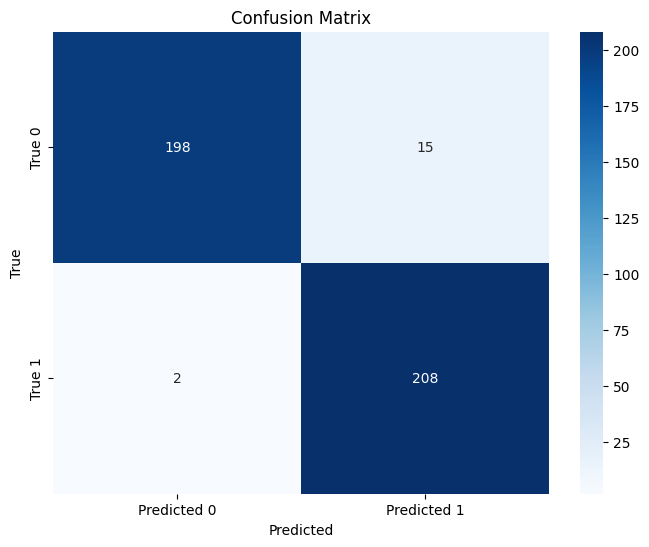

In [62]:
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

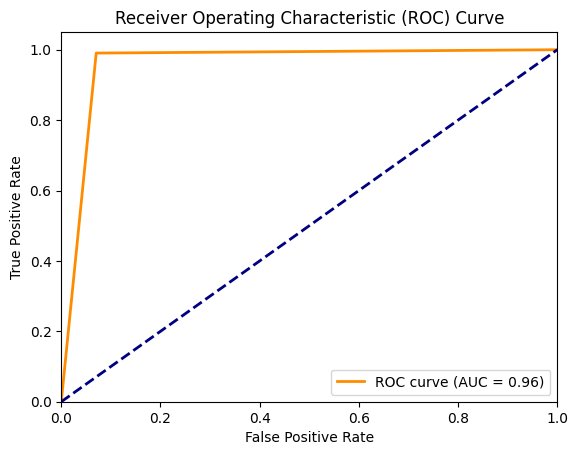

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

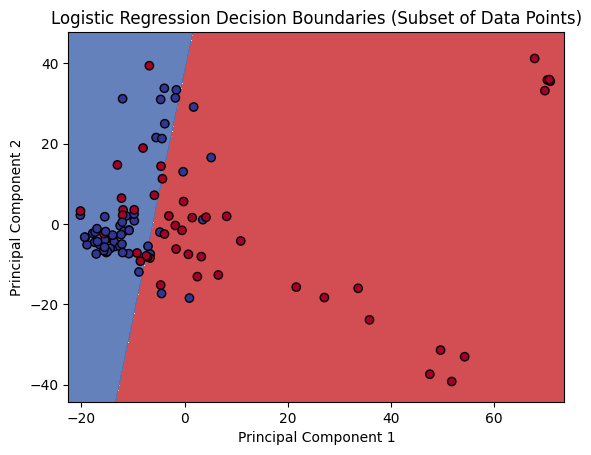

In [64]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)


lr = LogisticRegression()
lr.fit(X_train_pca, y_train)


h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#Plotting
indices = np.random.choice(X_train_pca.shape[0], 100, replace=False)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], c=y_train[indices], cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title('Logistic Regression Decision Boundaries (Subset of Data Points)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()